In [1]:
from rlmodule import *
import matplotlib.pyplot as plt

In [2]:
#initialise important parameters
q = np.ones([4,70])*100
w = np.ones(70)
gamma = 1

In [3]:
#for first 2000 rounds of training
alpha = 0.001
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_episode(q,w,alpha,gamma)
  tot_episodes += 100

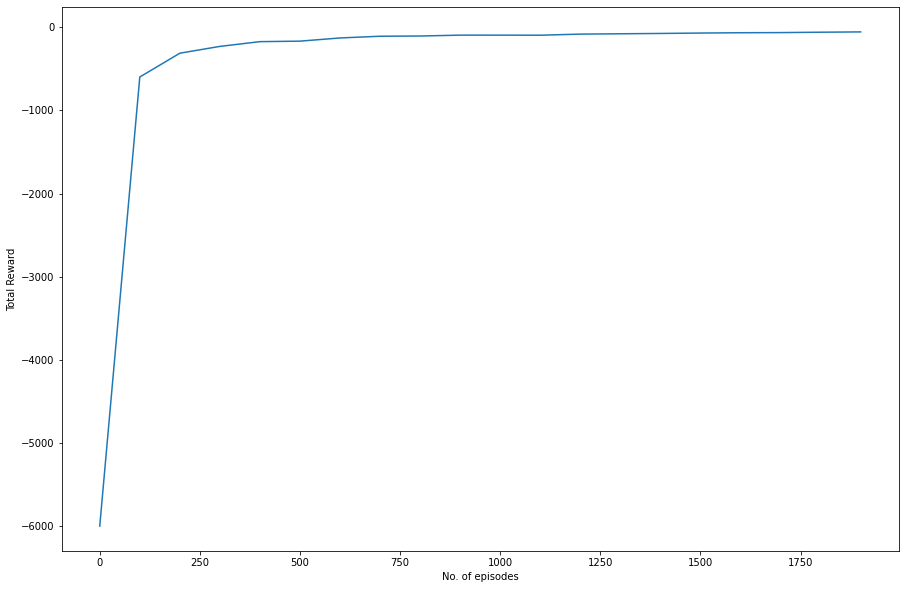

In [4]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [5]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

In [6]:
av_steps = Tot_steps/50
print(av_steps)

54.4


In [7]:
times_visited

array([[22., 33., 65., 61., 46., 31., 38., 68., 81., 80.],
       [19., 23., 49., 27., 33., 67., 38., 12.,  6., 84.],
       [39., 28., 45., 15., 31., 75., 26.,  7., 17., 82.],
       [91., 35., 46., 33., 50., 51., 12., 50., 11., 79.],
       [87., 57., 59., 21., 47., 37.,  0.,  6., 59., 79.],
       [60., 56., 73., 44., 53.,  0.,  0.,  4., 18., 39.],
       [59., 40., 62., 63.,  0.,  0.,  0.,  0., 14., 27.]])

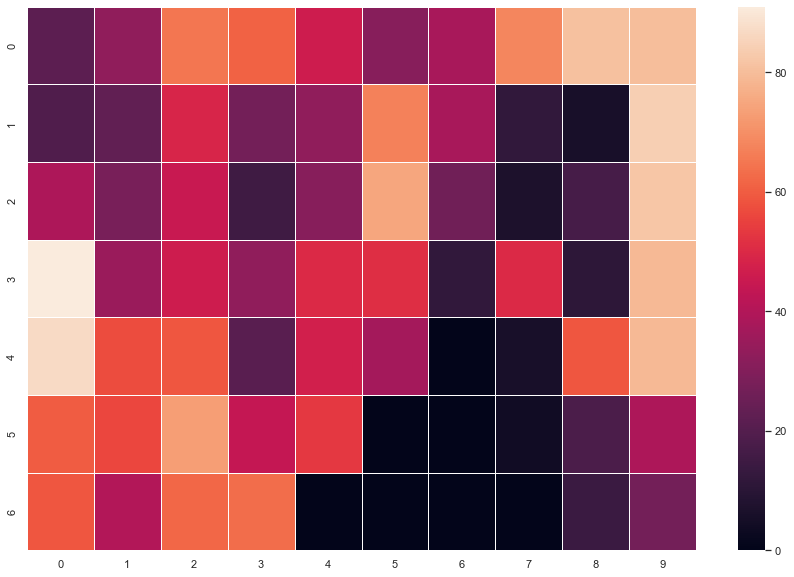

In [8]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [9]:
#let us try to plot the value function for the grid
value_grid = np.zeros(times_visited.shape)
for i in range(7):
  for j in range(10):
    s = i*10 +j
    value_grid[i][j] = v(w,s)
df = pd.DataFrame(value_grid)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9
0,-5.742959,-6.096879,-7.148758,-7.788178,-8.462350,-9.181461,-8.896929,-7.990059,-7.229874,-6.494438
1,-5.731010,-5.875584,-6.661255,-7.474263,-8.962081,-10.954360,-6.971560,-6.467650,-5.667009,-5.727523
2,-5.854260,-5.748677,-6.148331,-6.992927,-9.389741,-5.934083,-3.937966,-4.637276,-5.332302,-4.887135
3,-6.226860,-5.679051,-5.628167,-6.584220,-5.189503,-3.445953,-0.922212,1.000000,-4.219689,-3.919848
4,-5.640925,-5.223295,-4.968067,-4.903437,-3.522503,-0.830157,1.000000,-0.863790,-0.944256,-2.775723
5,-5.073860,-4.620814,-4.244938,-3.835816,-1.766061,1.000000,1.000000,0.083034,-1.705321,-2.366416
6,-4.613891,-4.007193,-3.310721,-2.598713,1.000000,1.000000,1.000000,1.000000,-0.606149,-1.548916


In [11]:
#let us plot the probabilities corresponding to the four actions
prob_grid = np.zeros([7,10,4])
for k in range(4):
    for i in range(7):
        for j in range(10):
            s = i*10 + j
            a = policy(s,q)
            prob_grid[i][j][k]=a[k] 

In [12]:
df_up = pd.DataFrame(prob_grid[:,:,0])
df_right = pd.DataFrame(prob_grid[:,:,1])
df_down = pd.DataFrame(prob_grid[:,:,2])
df_left = pd.DataFrame(prob_grid[:,:,3])

In [13]:
df_right

,0,1,2,3,4,5,6,7,8,9
0,0.164978,0.092926,0.034522,0.028138,0.048771,0.150777,0.678842,0.839987,0.878609,0.043836
1,0.196915,0.142325,0.051285,0.084785,0.067345,0.070923,0.376783,0.394824,0.218939,0.043977
2,0.246841,0.176185,0.064105,0.188604,0.094810,0.387386,0.239863,0.222835,0.144376,0.051569
3,0.237540,0.219302,0.118100,0.349451,0.606356,0.397915,0.253354,0.250000,0.131899,0.060474
4,0.255908,0.305979,0.220555,0.652409,0.564202,0.317961,0.250000,0.154222,0.040265,0.098486
5,0.327602,0.474584,0.549801,0.677038,0.460525,0.250000,0.250000,0.209358,0.161805,0.170072
6,0.410426,0.568800,0.658578,0.574954,0.250000,0.250000,0.250000,0.250000,0.183671,0.230977


In [14]:
df_up

,0,1,2,3,4,5,6,7,8,9
0,0.227045,0.188738,0.070435,0.052040,0.076419,0.134046,0.104858,0.062234,0.046974,0.043803
1,0.161540,0.112527,0.038609,0.120750,0.089330,0.060058,0.213476,0.214217,0.126577,0.023331
2,0.160375,0.116080,0.037192,0.076699,0.044886,0.036776,0.177871,0.161368,0.078972,0.024509
3,0.118905,0.099140,0.044905,0.069456,0.038512,0.062400,0.193191,0.250000,0.087191,0.031612
4,0.103776,0.104493,0.059131,0.050900,0.058780,0.170654,0.250000,0.161671,0.033787,0.051613
5,0.127690,0.107172,0.076380,0.053491,0.133861,0.250000,0.250000,0.219863,0.118190,0.110444
6,0.156413,0.130121,0.099792,0.090633,0.250000,0.250000,0.250000,0.250000,0.216198,0.154603


In [15]:
df_down

,0,1,2,3,4,5,6,7,8,9
0,0.363358,0.408840,0.590864,0.052005,0.075803,0.137802,0.116820,0.061281,0.047162,0.890064
1,0.411911,0.516702,0.806683,0.549236,0.674323,0.759982,0.207618,0.223287,0.567781,0.894880
2,0.358160,0.531899,0.821458,0.539470,0.787314,0.526587,0.394045,0.491332,0.446860,0.870487
3,0.490626,0.539638,0.766932,0.448193,0.296275,0.468658,0.352283,0.250000,0.367928,0.834040
4,0.465548,0.472533,0.643646,0.209146,0.307319,0.328587,0.250000,0.416026,0.084867,0.310259
5,0.339501,0.291837,0.289049,0.193199,0.293698,0.250000,0.250000,0.284715,0.283931,0.378215
6,0.208717,0.178468,0.152553,0.228156,0.250000,0.250000,0.250000,0.250000,0.273979,0.238216


In [16]:
df_left

,0,1,2,3,4,5,6,7,8,9
0,0.244619,0.309497,0.304179,0.867818,0.799007,0.577375,0.099481,0.036499,0.027255,0.022297
1,0.229633,0.228446,0.103423,0.245229,0.169002,0.109036,0.202123,0.167672,0.086703,0.037812
2,0.234624,0.175836,0.077245,0.195227,0.072991,0.049251,0.188220,0.124466,0.329793,0.053434
3,0.152929,0.141921,0.070062,0.132899,0.058857,0.071028,0.201172,0.250000,0.412982,0.073874
4,0.174768,0.116996,0.076668,0.087545,0.069699,0.182797,0.250000,0.268082,0.841082,0.539642
5,0.205208,0.126407,0.084770,0.076272,0.111917,0.250000,0.250000,0.286065,0.436074,0.341269
6,0.224444,0.122611,0.089077,0.106257,0.250000,0.250000,0.250000,0.250000,0.326152,0.376204


In [17]:
q_val =pd.DataFrame(q)

In [18]:
q_val

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,99.943634,99.860251,99.280816,99.450395,99.527511,99.598607,99.519207,99.486644,99.402909,99.415722,...,99.596423,99.567108,99.450542,99.267567,100.0,100.0,100.0,100.0,99.878757,99.569237
1,99.624300,99.151694,98.567722,98.835506,99.078422,99.716230,101.386991,102.089130,102.331647,99.416475,...,100.561119,101.042174,101.337537,101.115041,100.0,100.0,100.0,100.0,99.715706,99.970697
2,100.413876,100.633215,101.407715,99.449727,99.519418,99.626246,99.627234,99.471207,99.406895,102.427317,...,99.884906,99.883054,99.874963,100.190780,100.0,100.0,100.0,100.0,100.115614,100.001557
3,100.018191,100.354840,100.743746,102.264372,101.874650,101.058917,99.466569,98.953018,98.858549,98.740486,...,99.957552,99.507664,99.336959,99.426611,100.0,100.0,100.0,100.0,100.289923,100.458509
